In [1]:
# In Class Lab 6
# Surface Brightness Profiles


In [6]:
# Load Modules
import numpy as np
import astropy.units as u

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# my modules
from Readfile import Read
from CenterOfMass import CenterOfMass
from MassProfile 

SyntaxError: invalid syntax (<ipython-input-6-6f71a2202f8b>, line 13)

# Lab 6: Sersic Profiles

In this lab we will use Homework 5 solutions to compute the mass profile of the Milky Way's bulge. 
We will turn the mass profile into a density profile and see if we can fit it reasonably well 
with a sersic profile. 

# Part A : 

Create a function called `SersicE` that returns the Sersic Profile in terms of the effective radius $R_e$ (i.e. the half light radius).

$I(r) = I_e exp^{-7.67 ( (r/R_e)^{1/n} - 1)}$

Where 

$ L = 7.2 I_e \pi R_e^2$

and  $R_e$ is the half light radius.  We will assume a mass to light ratio for the stellar bulge of 1, so this is also the half mass radius.

The function should take as input: the radius, $R_e$, $n$ and the total stellar mass of the system.


In [3]:
# Function that will return the sersic profile for an elliptical system

def SersicE(R, Re, n, Mtot):
    # inputs
    #     R: an array of radii (kpc)
    #     Re: half-light radius (kpc)
    #     n: sersic index
    #     Mtot: total stellar mass (Msun)
    
    # returns:
    #     Surface Brightness Profile in (Lsun/kpc^2)
    
    # assume M/L ~ 1
    L = Mtot # total luminosity is equivalent to total stellar mass
    
    # Ie = L/7.2/pi/Re^2
    Ie = L/(7.2*np.pi*(Re**2))
    
    a = ( (R/Re)**(1/n) ) - 1
    
    return Ie*np.exp(-7.767*a)
    

# Part B

a) Create an instance of the MassProfile Class for the M31. Store it as a variable `M31`. 


In [9]:
M31 = MassProfile("M31", 0)

b) Create an array of radii from 0.1 kpc to 30 kpc in increments of 0.1


In [10]:
R = np.arange(0.1,30,0.1)

c) Define a new array called `BulgeMass`, that uses the function `MassEnclosed` within MassProfile to compute the mass profile of the bulge.  Get rid of astropy units in `BulgeMass` by adding `.value` 


In [11]:
BulgeMass = M31.MassEnclosed(3, R) # particle type 3 = bulge

In [12]:
BulgeMass[10]

<Quantity 5.20565496e+09 solMass>

d) Compute the surface mass density profile for the simulated bulge and store it as an array called `BulgeI`. Assuming M/L ~ 1 this is also the surface brightness profile in Lsun/kpc^2

In [15]:
# I = L/4piD^2
# surface brightness Flux/area^2

BulgeI = BulgeMass/(4*np.pi*(R**2))

# Part C

Compute $R_e$, the half mass radius, for the bulge

In [23]:
BulgeTotal = np.max(BulgeMass) # total mass of the bulge
print(BulgeTotal/2)

8918393849.999996 solMass


In [18]:
Low = BulgeTotal/2
High = BulgeTotal/2 + (BulgeTotal/2)*0.01

In [24]:
index = np.where( (BulgeMass>Low)&(BulgeMass<High) )
Re = R[index]
print(BulgeMass[index])

[8.9735385e+09] solMass


# Part D

a) Plot the surface density profile of the simulated bulge

b) Plot the Sersic profile, assuming a de Vaucouleurs Profile.

c) If the profiles don't match, try changing either $R_e$ or $n$

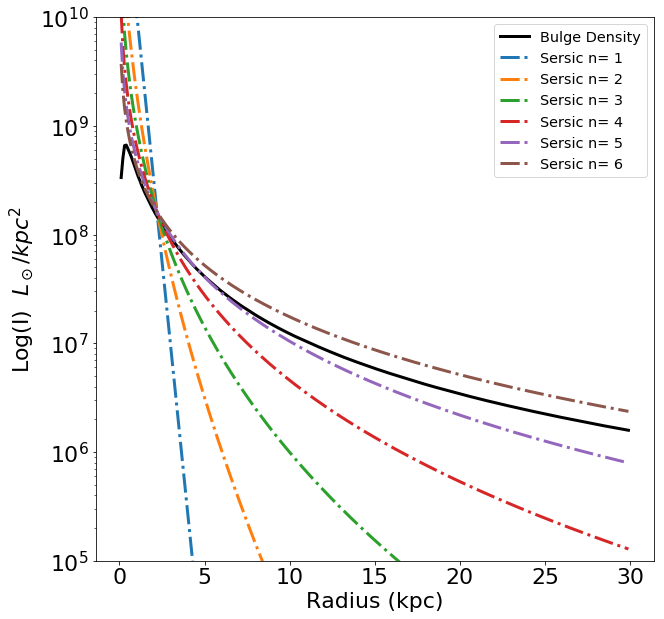

In [55]:
# Plot the Bulge density profile vs 
# the Sersic profile
####################################


fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)


# plot the bulge luminosity density as a proxy for surface brighntess
plt.semilogy(R,BulgeI, color='black',linewidth=3, label='Bulge Density')


# YOU ADD HERE: Sersic fit to the surface brightness Sersic fit
# Sersic 
n = 1
for i in range(6):
    plt.semilogy(R, SersicE(R,Re,n+(i),BulgeTotal),linestyle="-.", linewidth=3, label="Sersic n= %s" %(n+i))

plt.ylim(10e4,10e9)
#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size


# Add axis labels
plt.xlabel('Radius (kpc)', fontsize=22)
plt.ylabel('Log(I)  $L_\odot/kpc^2$', fontsize=22)



# add a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large')

plt.show()


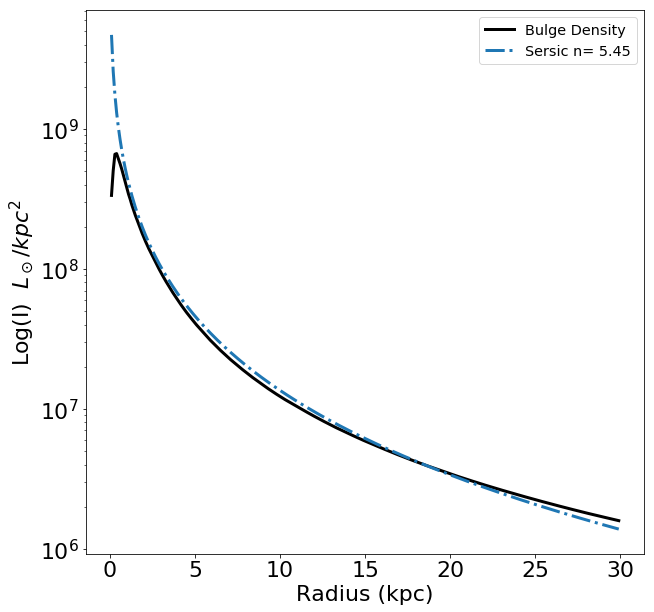

In [53]:
# Plot the Bulge density profile vs 
# the Sersic profile
####################################


fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)


# plot the bulge luminosity density as a proxy for surface brighntess
plt.semilogy(R,BulgeI, color='black',linewidth=3, label='Bulge Density')


# YOU ADD HERE: Sersic fit to the surface brightness Sersic fit
# Sersic 
n = 5.45
plt.semilogy(R, SersicE(R,Re,n,BulgeTotal),linestyle="-.", linewidth=3, label="Sersic n= %s" %(n))


#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size


# Add axis labels
plt.xlabel('Radius (kpc)', fontsize=22)
plt.ylabel('Log(I)  $L_\odot/kpc^2$', fontsize=22)



# add a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large')

plt.show()
